# MNIST data set

<img src="download.jpg" style="width:400px;height=200px"/>

# Preparing data

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv("mnist_dataset.csv")

data.drop("Unnamed: 0",axis=1,inplace=True)
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
sum(data.sum(axis=1)==0)
# There is no empty row.

0

In [4]:
train_set=data.iloc[:60000,1:]
train_y=data[["label"]].loc[:59999]
print(train_set.shape)
print(train_y.shape)
print(np.ravel(train_y).shape)

(60000, 784)
(60000, 1)
(60000,)


In [5]:
test_set=data.iloc[60000: ,1:]
test_y=data[["label"]].loc[60000:]
print(test_set.shape)
print(test_y.shape)

(10000, 784)
(10000, 1)


# Random Forest model

In [6]:


from sklearn.ensemble import RandomForestClassifier
import time


In [7]:
time_start = time.time()
clf = RandomForestClassifier()
clf.fit(train_set,np.ravel(train_y))

print('RandomForestClassifier done! Time elapsed: {} seconds'.format(time.time()-time_start))

RandomForestClassifier done! Time elapsed: 37.7547082901001 seconds


In [8]:
y_rf_pr = clf.fit(train_set,np.ravel(train_y)).predict(test_set)
y_rf_pr.shape

(10000,)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


In [10]:
target_names=["0","1","2","3","4","5","6","7","8","9"]

feat_cols = ['pixel' + str(i) for i in range(data.iloc[:,1:].shape[1])]


In [11]:
print(classification_report(test_y, y_rf_pr, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       959
           1       0.99      0.99      0.99      1155
           2       0.97      0.97      0.97      1007
           3       0.96      0.95      0.95      1039
           4       0.96      0.97      0.97       925
           5       0.96      0.97      0.97       921
           6       0.98      0.98      0.98       972
           7       0.97      0.97      0.97      1048
           8       0.95      0.96      0.95       953
           9       0.96      0.94      0.95      1021

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# PCA

In [12]:

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
train_set_transformed = pca.fit_transform(train_set)

test_set_transformed = pca.transform(test_set)
print(train_set_transformed.shape)
print(test_set_transformed.shape)

(60000, 154)
(10000, 154)


In [13]:
time_start = time.time()
clf = RandomForestClassifier()
clf.fit(train_set_transformed,np.ravel(train_y))

print('RandomForestClassifier done! Time elapsed: {} seconds'.format(time.time()-time_start))

RandomForestClassifier done! Time elapsed: 82.60420179367065 seconds


In [14]:
y_transformed_pr = clf.fit(train_set_transformed,np.ravel(train_y)).predict(test_set_transformed)


In [24]:
print(classification_report(test_y, y_transformed_pr, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       959
           1       0.98      0.98      0.98      1155
           2       0.94      0.94      0.94      1007
           3       0.92      0.93      0.93      1039
           4       0.94      0.96      0.95       925
           5       0.93      0.94      0.93       921
           6       0.98      0.98      0.98       972
           7       0.95      0.95      0.95      1048
           8       0.93      0.92      0.92       953
           9       0.93      0.91      0.92      1021

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
# Interpretation
#The accuracy after pc has decreased shows that we lost some important information during reduction from 784 to 154 features.
#The time of fitting a model on feature reduced data is longer than original data.

# t-SNE

In [15]:
# I did t-SNE on all data and it took 6620 Seconds! So I decided to do a subset of data.
# I did one time t_SNE on subset data directly,and another time I did t_SNE following the pcr at first.



In [5]:
N=10000
data_subset = data.loc[:N, :].copy()

data_subset.iloc[:,1:].values.shape


(10001, 784)

In [17]:
from sklearn.manifold import TSNE
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_result = tsne.fit_transform(data_subset.iloc[:,1:])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 2.419s...
[t-SNE] Computed neighbors for 10001 samples in 128.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 435.853079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.343102
[t-SNE

In [6]:
data_subset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


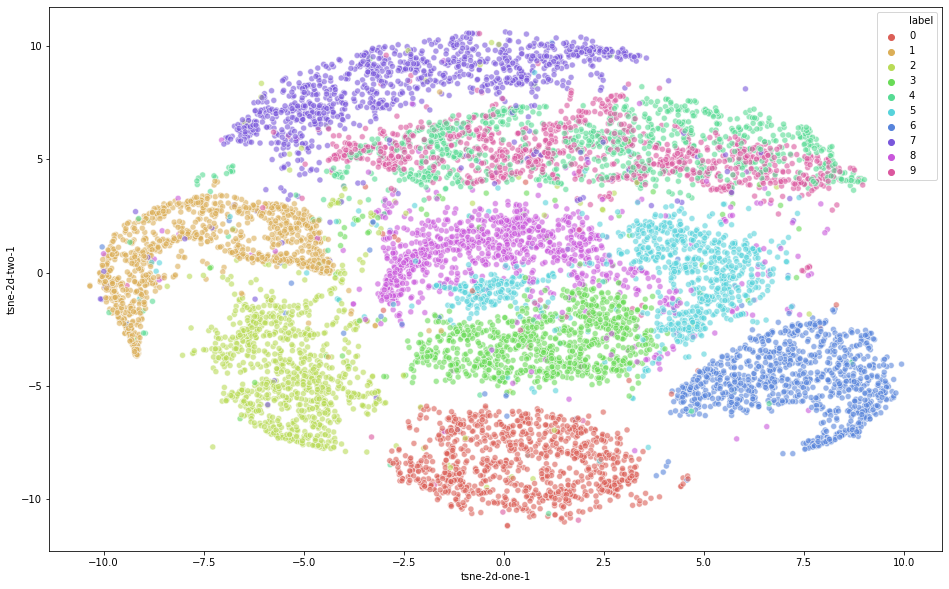

In [28]:
data_subset['tsne-2d-one-1'] = tsne_result[:, 0]
data_subset['tsne-2d-two-1'] = tsne_result[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one-1', y='tsne-2d-two-1', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6);

In [7]:
data_subset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# We are goint to do pca first and then t_SNE
pca_2 = PCA(n_components=0.95)
data_subset_pca = pca.fit_transform(data_subset.iloc[:,1:])
data_subset_pca.shape

(10001, 151)

In [20]:
time_start = time.time()

tsne_2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_result_2 = tsne.fit_transform(data_subset_pca)

print('Second t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.339s...
[t-SNE] Computed neighbors for 10001 samples in 30.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 453.698757
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.289009
[t-SNE]

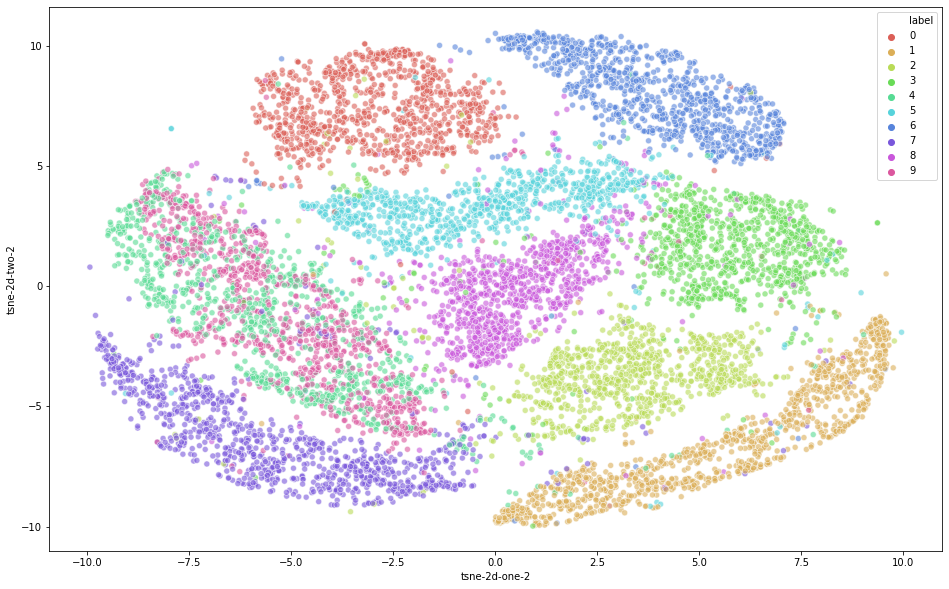

In [29]:
data_subset['tsne-2d-one-2'] = tsne_result_2[:, 0]
data_subset['tsne-2d-two-2'] = tsne_result_2[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one-2', y='tsne-2d-two-2', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6);

In [21]:
# When we did pcr first, the time of following t_SNE decreased.

# LLE

In [22]:


from sklearn.manifold import LocallyLinearEmbedding
time_start = time.time()
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)
X_reduced_lle = lle.fit_transform(data_subset.iloc[:,1:])
print('LLE done! Time elapsed: {} seconds'.format(time.time()-time_start))


LLE done! Time elapsed: 158.9518325328827 seconds


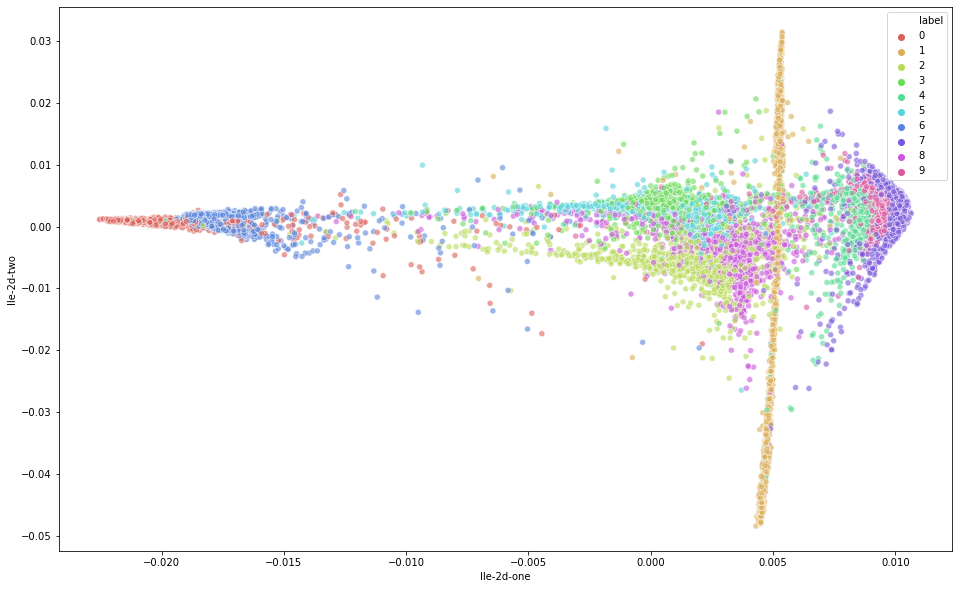

In [23]:
data_subset['lle-2d-one'] = X_reduced_lle[:, 0]
data_subset['lle-2d-two'] = X_reduced_lle[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='lle-2d-one', y='lle-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6);

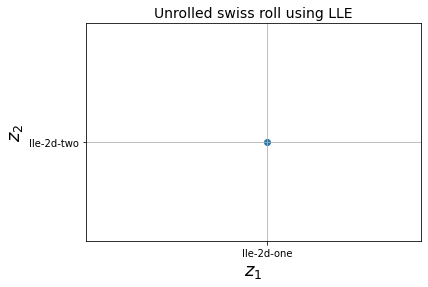

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.title("Unrolled swiss roll using LLE", fontsize=14)
#plt.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1],cmap=plt.cm.hot)
plt.scatter(x='lle-2d-one',y='lle-2d-two' ,cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

In [5]:
from sklearn.manifold import MDS
import time
time_start = time.time()
embedding = MDS(n_components=2,n_jobs=-1)
X_md_transformed = embedding.fit_transform(data_subset.iloc[:,1:])

print(X_md_transformed.shape)
print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

(10001, 2)
MDS done! Time elapsed: 15552.862249135971 seconds


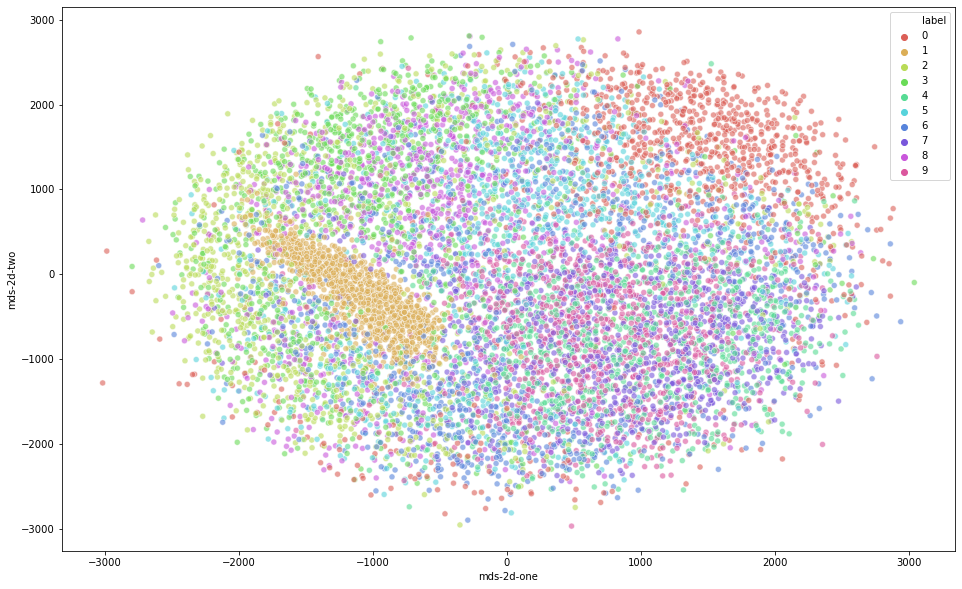

In [26]:
data_subset['mds-2d-one'] = X_md_transformed[:, 0]
data_subset['mds-2d-two'] = X_md_transformed[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='mds-2d-one', y='mds-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6);

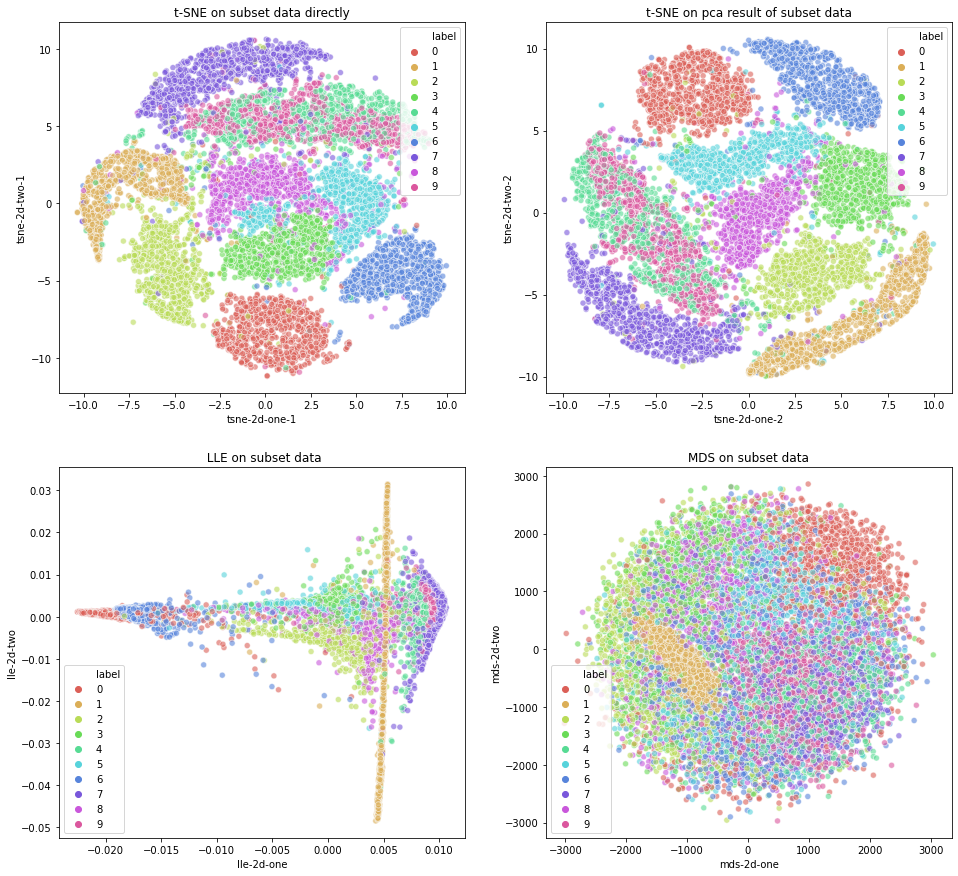

In [30]:
plt.figure(figsize=(16,15))

ax1 = plt.subplot(2, 2, 1)

sns.scatterplot(x='tsne-2d-one-1', y='tsne-2d-two-1', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset, alpha=0.6,ax=ax1)
ax1.title.set_text("t-SNE on subset data directly")            

ax2 = plt.subplot(2, 2, 2)

sns.scatterplot(x='tsne-2d-one-2', y='tsne-2d-two-2', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6,ax=ax2)
ax2.title.set_text("t-SNE on pca result of subset data")

ax3 = plt.subplot(2, 2, 3)

sns.scatterplot(x='lle-2d-one', y='lle-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6,ax=ax3)
ax3.title.set_text(" LLE on subset data")

ax4 = plt.subplot(2, 2, 4)
sns.scatterplot(x='mds-2d-one', y='mds-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6,ax=ax4);

ax4.title.set_text("MDS on subset data")



In [ ]:
#According to visual comparison, it seems plot2(ax2) that dimensionality reduction has been done firstly by "pcn" and then by "t_SNE",
# has better result ,as the classes are separated more efficiently. Actually in plot 2 labels 5,8 and 4 are clearly detectable, while in plot they are very close together.
# In plot 3(LLE) labels 6 & 1 are only recognizable.
#In plot 4 (MDS)except labels 0 & 1 are separated and classified,and most of the rest are mixed up.
# Plus MDS has the most operation time, while plot2 has the minimum time.